# Preprocessing Before Training

In this notebook I played around with the idea of preprocessing the data before training. In particular, I used a super basic edge detection algorithm and passed both the original image and the edges to the network. The network trained on both the original images and the edges performed much better than a standard network.

Preprocessing like this to extract certain features from images and passing all the data to a neural network could be intriguing to explore in the future.

## Load data

In [1]:
from typing import *
import numpy as np
from matplotlib import pyplot as plt
from data_loader import load_data

In [2]:
np.set_printoptions(suppress=True, precision=2)
# random seed of 1 is good for standard network
np.random.seed(10)

In [3]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("fashion_mnist")

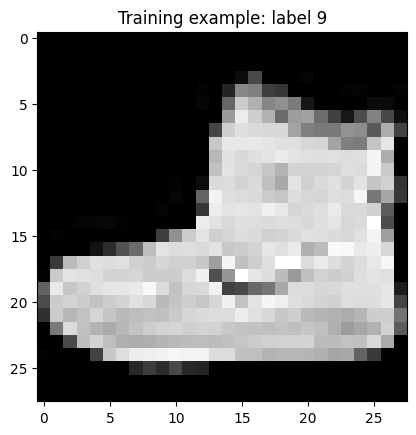

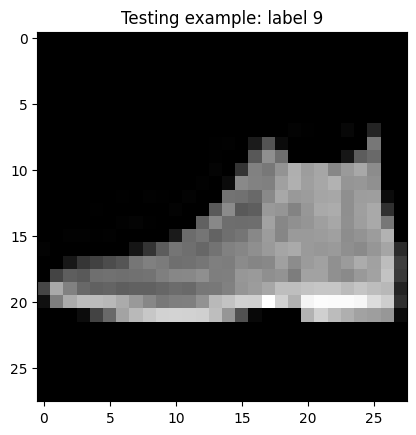

In [4]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [5]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

# inverted_training_data = [(1 - x, y) for x, y in training_data]
# inverted_testing_data = [(1 - x, y) for x, y in testing_data]

# training_data.extend(inverted_training_data)
# testing_data.extend(inverted_testing_data)

## Basic Network

### Initialize the network

In [6]:
from network import *
from layers import *
from loss import *

In [7]:
layers = [
    Dense(729, 30, regularization_parameter=5),
    LeakyReLU(30, 0.1),
    Dense(30, 10, regularization_parameter=5),
    LeakyReLU(10, 0.1),
    Softmax(10)
]
network = Network(layers, 0.02, 10)

## Difference matrices

In [8]:
def transform(data):
    new = np.zeros((27, 27))
    for i in range(27):
        for j in range(27):
            index = 28 * i + j
            new[i, j] = abs(data[index+1] - data[index]) + \
                abs(data[index+28] - data[index])
    return new

In [9]:
new_training_data = [(transform(x).flatten(), y) for x, y in training_data]
new_testing_data = [(transform(x).flatten(), y) for x, y in testing_data]

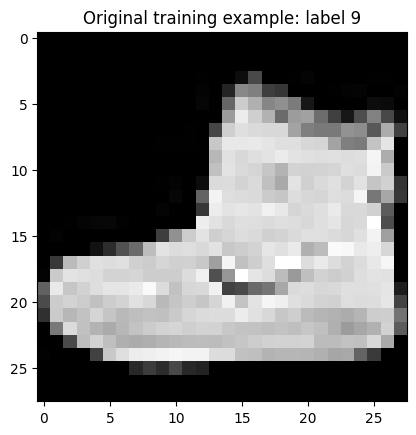

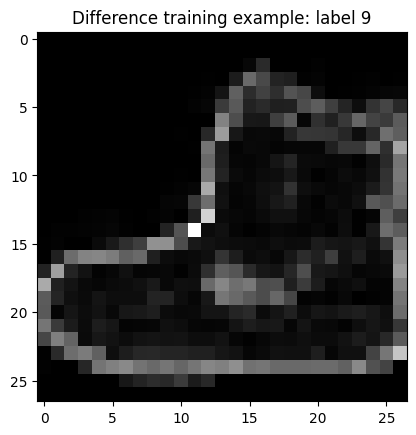

In [10]:
ori_image, ori_label = training_data[0]
image, label = new_training_data[0]

plt.imshow(ori_image.reshape((28, 28)), interpolation="nearest", cmap='gray')
plt.title("Original training example: label " + str(np.argmax(ori_label)))
plt.show()

plt.imshow(image.reshape((27, 27)), interpolation="nearest", cmap='gray')
plt.title("Difference training example: label " + str(np.argmax(label)))
plt.show()

In [11]:
network.reset()
network.set_training(True)

correct = network.evaluate(new_testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

network.train(30, new_training_data, NLL(), new_testing_data)

Epoch 0: 1140 / 10000 (11.4%)
Epoch 1: 8186 / 10000 (81.9%)
Epoch 2: 8333 / 10000 (83.3%)
Epoch 3: 8360 / 10000 (83.6%)
Epoch 4: 8365 / 10000 (83.7%)
Epoch 5: 8402 / 10000 (84.0%)
Epoch 6: 8517 / 10000 (85.2%)
Epoch 7: 8473 / 10000 (84.7%)
Epoch 8: 8399 / 10000 (84.0%)
Epoch 9: 8507 / 10000 (85.1%)
Epoch 10: 8532 / 10000 (85.3%)
Epoch 11: 8530 / 10000 (85.3%)
Epoch 12: 8526 / 10000 (85.3%)
Epoch 13: 8522 / 10000 (85.2%)
Epoch 14: 8584 / 10000 (85.8%)
Epoch 15: 8517 / 10000 (85.2%)
Epoch 16: 8591 / 10000 (85.9%)
Epoch 17: 8603 / 10000 (86.0%)
Epoch 18: 8551 / 10000 (85.5%)
Epoch 19: 8551 / 10000 (85.5%)
Epoch 20: 8611 / 10000 (86.1%)
Epoch 21: 8607 / 10000 (86.1%)
Epoch 22: 8598 / 10000 (86.0%)
Epoch 23: 8585 / 10000 (85.9%)
Epoch 24: 8562 / 10000 (85.6%)
Epoch 25: 8573 / 10000 (85.7%)
Epoch 26: 8590 / 10000 (85.9%)
Epoch 27: 8619 / 10000 (86.2%)
Epoch 28: 8558 / 10000 (85.6%)
Epoch 29: 8601 / 10000 (86.0%)
Epoch 30: 8526 / 10000 (85.3%)


The network seems to be learning some useful stuff from the edge matrices, so I tried combining both the original data and the difference data.

I also doubled the hidden neurons since there are many more input neurons.

In [12]:
def transform1(data):
    new = transform(data)
    return np.concatenate([data.flatten(), new.flatten()]).ravel()

In [13]:
new_training_data = [(transform1(x), y) for x, y in training_data]
new_testing_data = [(transform1(x), y) for x, y in testing_data]

In [14]:
layers = [
    Dense(784+729, 60, regularization_parameter=5),
    LeakyReLU(60, 0.1),
    Dense(60, 10, regularization_parameter=5),
    LeakyReLU(10, 0.1),
    Softmax(10)
]
network = Network(layers, 0.02, 10)

In [15]:
network.reset()
network.set_training(True)

correct = network.evaluate(new_testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

network.train(30, new_training_data, NLL(), new_testing_data)

Epoch 0: 994 / 10000 (9.9%)
Epoch 1: 8572 / 10000 (85.7%)
Epoch 2: 8728 / 10000 (87.3%)
Epoch 3: 8744 / 10000 (87.4%)
Epoch 4: 8654 / 10000 (86.5%)
Epoch 5: 8667 / 10000 (86.7%)
Epoch 6: 8844 / 10000 (88.4%)
Epoch 7: 8760 / 10000 (87.6%)
Epoch 8: 8809 / 10000 (88.1%)
Epoch 9: 8758 / 10000 (87.6%)
Epoch 10: 8869 / 10000 (88.7%)
Epoch 11: 8875 / 10000 (88.8%)
Epoch 12: 8858 / 10000 (88.6%)
Epoch 13: 8880 / 10000 (88.8%)
Epoch 14: 8782 / 10000 (87.8%)
Epoch 15: 8892 / 10000 (88.9%)
Epoch 16: 8788 / 10000 (87.9%)
Epoch 17: 8869 / 10000 (88.7%)
Epoch 18: 8872 / 10000 (88.7%)
Epoch 19: 8890 / 10000 (88.9%)
Epoch 20: 8908 / 10000 (89.1%)
Epoch 21: 8781 / 10000 (87.8%)
Epoch 22: 8917 / 10000 (89.2%)
Epoch 23: 8850 / 10000 (88.5%)
Epoch 24: 8871 / 10000 (88.7%)
Epoch 25: 8912 / 10000 (89.1%)
Epoch 26: 8920 / 10000 (89.2%)
Epoch 27: 8851 / 10000 (88.5%)
Epoch 28: 8869 / 10000 (88.7%)
Epoch 29: 8881 / 10000 (88.8%)
Epoch 30: 8922 / 10000 (89.2%)


### Comparison with the original data

In [16]:
layers = [
    Dense(784, 60, regularization_parameter=5),
    LeakyReLU(60, 0.1),
    Dense(60, 10, regularization_parameter=5),
    LeakyReLU(10, 0.1),
    Softmax(10)
]
network = Network(layers, 0.02, 10)

In [17]:
network.reset()
network.set_training(True)

correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

network.train(30, training_data, NLL(), testing_data)

Epoch 0: 1056 / 10000 (10.6%)
Epoch 1: 8297 / 10000 (83.0%)
Epoch 2: 8470 / 10000 (84.7%)
Epoch 3: 8515 / 10000 (85.2%)
Epoch 4: 8485 / 10000 (84.9%)
Epoch 5: 8608 / 10000 (86.1%)
Epoch 6: 8630 / 10000 (86.3%)
Epoch 7: 8614 / 10000 (86.1%)
Epoch 8: 8558 / 10000 (85.6%)
Epoch 9: 8625 / 10000 (86.2%)
Epoch 10: 8687 / 10000 (86.9%)
Epoch 11: 8729 / 10000 (87.3%)
Epoch 12: 8704 / 10000 (87.0%)
Epoch 13: 8761 / 10000 (87.6%)
Epoch 14: 8717 / 10000 (87.2%)
Epoch 15: 8729 / 10000 (87.3%)
Epoch 16: 8697 / 10000 (87.0%)
Epoch 17: 8743 / 10000 (87.4%)
Epoch 18: 8716 / 10000 (87.2%)
Epoch 19: 8711 / 10000 (87.1%)
Epoch 20: 8677 / 10000 (86.8%)
Epoch 21: 8709 / 10000 (87.1%)
Epoch 22: 8790 / 10000 (87.9%)
Epoch 23: 8784 / 10000 (87.8%)
Epoch 24: 8770 / 10000 (87.7%)
Epoch 25: 8788 / 10000 (87.9%)
Epoch 26: 8757 / 10000 (87.6%)
Epoch 27: 8753 / 10000 (87.5%)
Epoch 28: 8706 / 10000 (87.1%)
Epoch 29: 8764 / 10000 (87.6%)
Epoch 30: 8756 / 10000 (87.6%)


The network trained with the original edge detection images performs much better than the standard network.